# $n$-island model with single step population size change

Let us recall the expressions of the c.d.f. and the d.f. of coalescence time in the $n$-island model.

For positive parameters $n \in \mathbb{N}$ (number of islands) and $M$ (migration rate) and $\rho$ the relative population size, the $Q$-matrix generating the process is
$$
    {Q} = \left(
        \begin{array}{ccc}
            -(M + 1/\rho ) & M & 1/\rho \\
            \frac{M}{n-1} & - \frac{M}{n-1} & 0 \\
            0 & 0 & 0
        \end{array}
    \right).
$$
To find the analytical expressions for the densities of $T_2^s$ and $T_2^d$, we will use the equations (10)-(20) in Mazet et al. (2016) and the re-scaling discussed in the appendices of the main document.
Let us define 
$$
    \gamma = \frac{M}{n-1} \rho
$$ 
and
\begin{align*}
    \alpha &= \frac{1}{2 \rho} (1 + n \gamma + \sqrt{\Delta})\\
    \beta &= \frac{1}{2 \rho} (1 + n \gamma - \sqrt{\Delta})
\end{align*}
where $\Delta = (1 + n \gamma)^2 - 4 \gamma$, and $\Delta / 4 \rho^2$ is the discriminant of the characteristic polynomial of $Q$: 
$$
    D: \theta \mapsto \theta^2 + \theta \frac{1 + n \gamma}{\rho} + \frac{\gamma}{\rho^2}. 
$$    
Note that $-\alpha$ and $-\beta$ are the roots of the polynomial $D$.

The, the density functions of $T_2^s$ and $T_2^d$ are
\begin{align*}
    f_{T_2^s}(t) &= a \mathrm{e}^{- \alpha t} + (1-a) \mathrm{e}^{- \beta t} \\
    f_{T_2^d}(t) &= c \mathrm{e}^{- \alpha t} - c \mathrm{e}^{- \beta t}
\end{align*}
where $a = \frac{\gamma - \alpha}{\beta - \alpha}$ and $c = \frac{\gamma}{\beta - \alpha}$. Besides, $\alpha > \beta > 0$ and $\alpha \beta = \gamma/\rho^2$.

The IICR functions of $T_2^s$ and $T_2^d$ are
\begin{align*}
    \mathrm{IICR}_{T_2^s}(t) &= \rho \frac{( 1/\rho - \beta ) \mathrm{e}^{- {\alpha} t} + ( \alpha  - 1/\rho ) \mathrm{e}^{- {\beta} t}}{({\alpha} -{\gamma}/\rho) \mathrm{e}^{- {\alpha} t} + ({\gamma}/\rho - {\beta}) \mathrm{e}^{- {\beta} t}} = \rho \frac{( 1/\rho - \beta ) \mathrm{e}^{- t \sqrt{\Delta}/\rho} + \alpha  - 1/\rho }{({\alpha} -{\gamma}/\rho) \mathrm{e}^{- t \sqrt{\Delta}/\rho}  + {\gamma}/\rho - {\beta} } \\
    \mathrm{IICR}_{T_2^d}(t) &= \rho \frac{{\beta} \mathrm{e}^{- {\alpha} t} - {\alpha} \mathrm{e}^{- {\beta} t}}{ {\gamma}/\rho \, \mathrm{e}^{- {\alpha} t} - {\gamma}/\rho \, \mathrm{e}^{- {\beta} t}} = \rho \frac{{\beta} \mathrm{e}^{- t \sqrt{\Delta}/\rho} - {\alpha} }{ \gamma/\rho ( \mathrm{e}^{- t \sqrt{\Delta}/\rho } - 1) }.
\end{align*}

In [1]:
using Plots

In [3]:
# Defining the parameters
m = 0.5; # migration rate
n = 5.0; # number of islands
ρ = 1; # relative population size
Q = [-(m + 1/ρ)  m 1/λ ; m/(n-1) -m/(n-1) 0 ; 0 0 0]; # defining the Q-matrix
display(Q) # printing Q

3×3 Matrix{Float64}:
 -1.5     0.5    1.0
  0.125  -0.125  0.0
  0.0     0.0    0.0

In [4]:
function density_anal_nI(t,m, n, ρ)
    # computing the densities using the analytical results
    # see main document for more details
    γ = m/(n-1) * ρ
    Δ = (1+n*γ)^2 - 4 * γ
    α = 1/2*(1 + n*γ + sqrt(Δ)) / ρ
    β = 1/2*(1 + n*γ - sqrt(Δ)) / ρ
    a = (γ/ρ - α)/(β - α)
    c = γ/ρ /(β - α)
    x = a*exp(- α * t) + (1 - a)*exp(- β * t)
    y = c*exp(- α * t) - c*exp(- β * t)
    return [x/ρ,y/ρ]
end

density_anal_nI (generic function with 1 method)

In [5]:
function IICR_anal_nI(t,m, n, ρ)
    # computing the IICRs using the analytical results
    γ = m/(n-1)*ρ
    Δ = (1+n*γ)^2 - 4 * γ
    α = 1/2*(1 + n*γ + sqrt(Δ)) / ρ
    β = 1/2*(1 + n*γ - sqrt(Δ)) / ρ
    a = (γ / ρ - α)/(β - α)
    c =  γ / ρ /(β - α)
    x = ( (1/ρ-β)*exp(-sqrt(Δ)/ρ * t) + α - 1/ρ )/( (α - γ/ρ)*exp(- sqrt(Δ)/ρ * t) + (γ/ρ - β) )
    y = ( β*exp(- sqrt(Δ)/ρ * t) - α )/( γ/ρ*exp(- sqrt(Δ)/ρ * t) - γ/ρ )
    return [x*ρ,y*ρ]
end

IICR_anal_nI (generic function with 1 method)

In [6]:
# auxiliar function to compute the limit of the IICR function when t → ∞
function limit_IICR(m, n, ρ)
    # computing the IICRs using the analytical results
    γ = m/(n-1)*ρ
    Δ = (1+n*γ)^2 - 4 * γ
    β = 1/2*(1 + n*γ - sqrt(Δ)) / ρ
    return β
end

limit_IICR (generic function with 1 method)

### Linear growth

Let us assume that $\lambda(t) = 1 + t$. Thus, 
$$
    \Lambda(t) = \int_0^t \frac{\mathrm{d} x}{\lambda(x)} = \ln(t + 1).
$$
Then, we can compute the following explicit expressions for the IICR under the hypothesis of *stron migration* as follows:
\begin{align*}
	\mathrm{IICR}^{(s)}_{\mathrm{SM}}(t) &= \lambda(t) \cdot \mathrm{IICR}_{T_2^s}(\Lambda(t)) = (t + 1) \frac{( 1 - \beta ) (t+1)^{- \sqrt{\Delta}/\lambda } +  \alpha  - 1 }{ ({\alpha} -{\gamma}) (t+1)^{- \sqrt{\Delta}/\lambda } + \gamma - \beta}\\
	\mathrm{IICR}^{(d)}_{\mathrm{SM}}(t) &= \lambda(t) \cdot \mathrm{IICR}_{T_2^d}(\Lambda(t)) = (t + 1) \frac{{\beta} (t+1)^{- \sqrt{\Delta}/\lambda } - \alpha }{ \gamma \, (t+1)^{- \sqrt{\Delta}/\lambda } - \gamma }
\end{align*}

For the *weak migration* settings we need to consider the system of differential equations
\begin{align*}
    x'(t) &= -\left(m + \frac{1}{(1+t)}\right) x(t) + \frac{m}{n-1} y(t) \\
    y'(t) &= m  x(t) - \frac{m}{n-1} y(t) 
\end{align*}
Then, we get
\begin{align*}
\mathrm{IICR}^{(s)}_{WM}(t) &= (1+t) \cdot \frac{x_s(t) + y_s(t)}{x_s(t)}\\
\mathrm{IICR}^{(d)}_{WM}(t) &= (1+t) \cdot \frac{x_d(t) + y_d(t)}{x_s(t)}
\end{align*}
where $(x_s, y_s)$ and $(x_d, y_d)$ are solutions of the system of ODE with initial conditions $(x_s(0), y_s(0)) = (1,0)$ and $(x_d(0), y_d(0)) = (0, 1)$, respectively.

### Strong migration

In [9]:
function IICR_anal_nI_linear_growth(t,m, n, ρ)
    # computing the IICR using the analytical results
    γ = m/(n-1)*ρ
    Δ = (1+n*γ)^2 - 4 * γ
    α = 1/2*(1 + n*γ + sqrt(Δ)) / ρ
    β = 1/2*(1 + n*γ - sqrt(Δ)) / ρ
    a = (γ / ρ - α)/(β - α)
    c =  γ / ρ /(β - α)
    x = ( (1/ρ-β)*(t+1)^(- sqrt(Δ)/ρ ) + α - 1/ρ )/( (α - γ/ρ)*(t+1)^(- sqrt(Δ)/ρ ) + γ/ρ - β )
    y = ( β*(t+1)^(- sqrt(Δ)/ρ ) - α )/( γ/ρ*(t+1)^(- sqrt(Δ)/ρ ) - γ/ρ )
    return [x*(t+1),y*(t+1)]
end

IICR_anal_nI_linear_growth (generic function with 1 method)

12.352349955359818

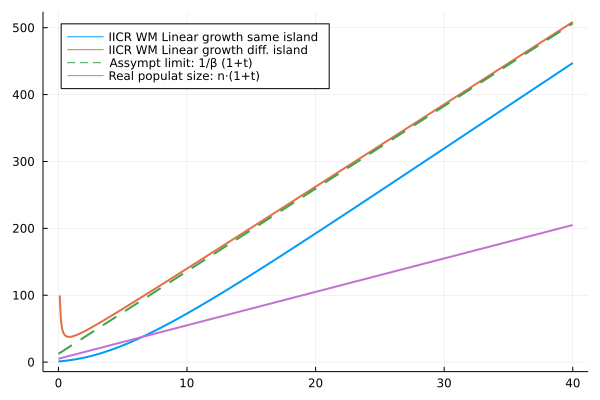

In [19]:
# Strong migration
# 
# Computing β, the eigenvalue related to the limit of the IICR functions
β = limit_IICR(m, n, ρ)
display(1/β)
# 
xs = range(0.0, 40.0, step = 0.1); # interval of the solutions
f2xs = IICR_anal_nI_linear_growth.(xs,(m,),(n,), (ρ,)); # vector of IICRs
f2xs1 = [x[1] for x in f2xs]; # extract first component
f2xs2 = [x[2] for x in f2xs]; # extract second component
# plotting
fig1 = plot(xs, f2xs1, label="IICR WM Linear growth same island", w = 2,  legend = :topleft)
fig1 = plot!(xs, f2xs2, label="IICR WM Linear growth diff. island", w = 2)
fig1 = plot!(xs, (xs.+ 1)./β, label="Assympt limit: 1/β (1+t)", w = 2, line = :dash)
fig1 = plot!(xs, n.*(xs.+ 1), label="Real populat size: n⋅(1+t)", w = 2,ine = :dash)
display(fig1)
# savefig(fig1,figpath*"fig1.pdf")

### Weak migration

In [57]:
using DifferentialEquations
# 
function ODE_linear_growth(du,u,p,t) # defining the ODE system
 du[1] = -(p[1] + 1/(1+t))*u[1] + p[1]/p[2] * u[2]
 du[2] = p[1]*u[1] - p[1]/p[2] * u[2]
end
# 
# defining the initial conditions
u0_same = [1.0; 0.0]
u0_diff = [0.0; 1.0]
#
T_max = 50.0
tspan = (0.0, T_max) # interval of the solution
p = (m,n-1) # parameters
# defining the ODE system for process starting at state s (both individuals in the same island)
prob_same = ODEProblem(ODE_linear_growth, u0_same, tspan,p) 
# defining the ODE system for process starting at state d (both individuals in different islands)
prob_diff = ODEProblem(ODE_linear_growth, u0_diff, tspan,p)
# 
# solving the ODE system for process starting at state s (both individuals in the same island)
sol_same_sol = solve(prob_same, Tsit5(), reltol=1e-8, abstol=1e-8)
# extracting each component
x_sol_same = [u[1] for u in sol_same_sol.u]
y_sol_same = [u[2] for u in sol_same_sol.u]
# 
# solving the ODE system for process starting at state d (both individuals in different islands)
sol_diff_sol = solve(prob_diff,  Tsit5(), reltol=1e-8, abstol=1e-8)
# exatracting each component
x_sol_diff = [u[1] for u in sol_diff_sol.u]
y_sol_diff = [u[2] for u in sol_diff_sol.u]
# 

89-element Vector{Float64}:
 1.0
 0.9981647761698859
 0.9940666382031004
 0.9889085973843296
 0.9827636148613325
 0.9756917862307152
 0.9678078563327794
 0.9592162680460673
 0.9500316883439097
 0.9403559448739311
 ⋮
 0.4892622735197765
 0.48637515731747705
 0.4835343590077203
 0.480738825787323
 0.4779875321226396
 0.4752794791239422
 0.4726136941056037
 0.4699892301362482
 0.4681430920825355

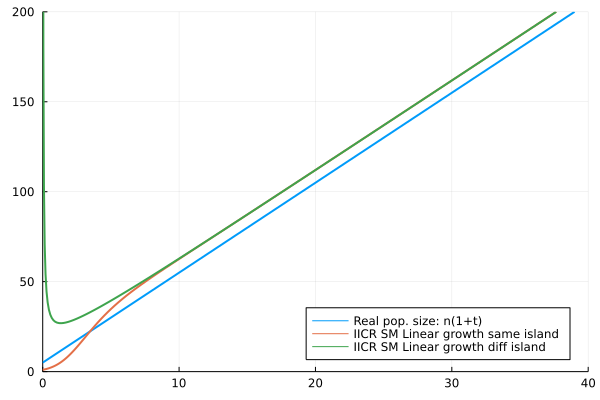

In [60]:
# plotting
plot(sol_same_sol.t, n.*(sol_same_sol.t.+ 1), label="Real pop. size: n(1+t)", lw=2, legend = :bottomright)
# plot!(sol_same_sol.t, 1/β.*(sol_same_sol.t .+ 1), label="Assympt limit: β λ (t)", lw=2)
plot!(sol_same_sol.t, (sol_same_sol.t .+ 1).*((x_sol_same .+ y_sol_same)./x_sol_same) ,
    lw=2, label="IICR SM Linear growth same island")
plot!(sol_diff_sol.t, (sol_diff_sol.t .+ 1).*((x_sol_diff .+ y_sol_diff)./x_sol_diff) ,
    lw=2, label="IICR SM Linear growth diff island")
ylims!((0,200))
xlims!((0,40))

In [61]:
# Figures in main text
# Defining the parameters
m = 0.5 # migration rate
n = 5.0 # number os islands
ρ = 1.0 # relative population size
# Computing β, the eigenvalue related to the limit of the IICR functions
β = limit_IICR(m, n, ρ)
# Upper bound for the plot
T_max = 50.0
# Strong migration
xs = range(0.1, T_max, step = 0.01)
# give vector of IICR
f2xs = IICR_anal_nI_linear_growth.(xs,(m,),(n,), (ρ,)); 
f2xs1 = [x[1] for x in f2xs]; # extract first component
f2xs2 = [x[2] for x in f2xs]; # extract second component
# 
# Weak migration
tspan = (0.0, T_max);
p = (m,n-1);
# defining the ODE systems
prob_same = ODEProblem(ODE_linear_growth, u0_same, tspan,p);
prob_diff = ODEProblem(ODE_linear_growth, u0_diff, tspan,p);
# solving the ODE for initial state s
sol_same = solve(prob_same, Tsit5(), reltol=1e-8, abstol=1e-8);
x_sol_same = [u[1] for u in sol_same.u];
y_sol_same = [u[2] for u in sol_same.u];
# solving the ODE for initial state d
sol_diff = solve(prob_diff, Tsit5(), reltol=1e-8, abstol=1e-8);
x_sol_diff = [u[1] for u in sol_diff.u];
y_sol_diff = [u[2] for u in sol_diff.u];

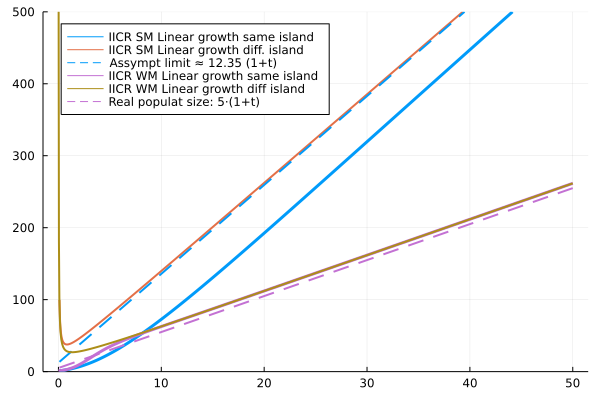

In [63]:
# Plot IICRs
figIICR_linear = plot(xs, f2xs1, label="IICR SM Linear growth same island", w = 3,  legend = :topleft)
figIICR_linear = plot!(xs, f2xs2, label="IICR SM Linear growth diff. island", w = 2)
figIICR_linear = plot!(xs, 1/β.*(xs.+ 1), label="Assympt limit ≈ 12.35 (1+t)", w = 2, line = :dash, color = 1)
figIICR_linear = plot!(sol_same.t, (sol_same.t .+ 1).*((x_sol_same + y_sol_same)./x_sol_same) ,
lw=3, label="IICR WM Linear growth same island")
figIICR_linear = plot!(sol_diff.t, (sol_diff.t .+ 1).*((x_sol_diff + y_sol_diff)./x_sol_diff) ,
lw=2, label="IICR WM Linear growth diff island")
figIICR_linear = plot!(xs, n*(xs.+ 1), label="Real populat size: 5⋅(1+t)", w = 2, line =  :dash,  color = 4)
ylims!((0,500))
savefig(figIICR_linear,"IICRs-linear_growth.pdf")
display(figIICR_linear)

In [42]:
# Figures in main text
# Defining the parameters
m = 0.5 # migration rate
n = 5.0 # number os islands
λ = 1.0 # relative population size
# Computing β, the eigenvalue related to the limit of the IICR functions
β = limit_IICR(m, n, λ)
# Upper bound for the plot
T_max = 100.0
# Strong migration
xs = range(0.0, T_max, step = 0.01)
# give vector of IICR
f2xs = IICR_anal_nI_linear_growth.(xs,(m,),(n,), (λ,)); 
f2xs1 = [x[1] for x in f2xs]; # extract first component
f2xs2 = [x[2] for x in f2xs]; # extract second component
# 
# Weak migration
tspan = (0.0, T_max);
p = (m,n-1);
# defining the ODE systems
prob_same = ODEProblem(ODE_linear_growth, u0_same, tspan,p);
prob_diff = ODEProblem(ODE_linear_growth, u0_diff, tspan,p);
# solving the ODE for initial state s
sol_same = solve(prob_same, Tsit5(), reltol=1e-8, abstol=1e-8);
x_sol_same = [u[1] for u in sol_same.u];
y_sol_same = [u[2] for u in sol_same.u];
# solving the ODE for initial state d
sol_diff = solve(prob_diff, Tsit5(), reltol=1e-8, abstol=1e-8);
x_sol_diff = [u[1] for u in sol_diff.u];
y_sol_diff = [u[2] for u in sol_diff.u];

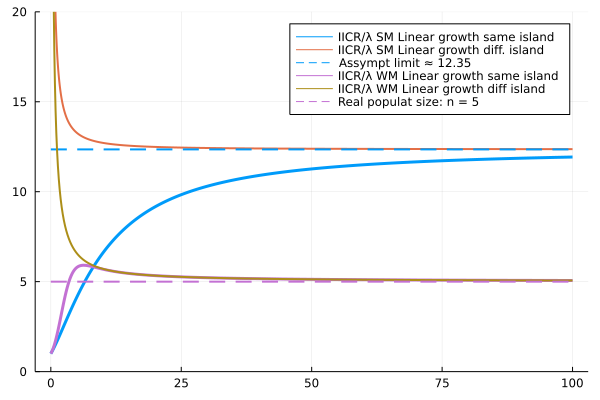

12.352349955359818

In [56]:
# Plot scaled IICRs
# plot of the IICR fucntions divided by the real population size

figscaled_IICR_linear = plot(xs, f2xs1./(xs .+1), label="IICR/λ SM Linear growth same island", w = 3)
figscaled_IICR_linear = plot!(xs, f2xs2./(xs .+1), label="IICR/λ SM Linear growth diff. island", w = 2)
figscaled_IICR_linear = plot!([first(xs),last(xs)], [1/β, 1/β], label="Assympt limit ≈ 12.35", w = 2, line =  :dash, color = 1)
figscaled_IICR_linear = plot!(sol_same.t, ((x_sol_same + y_sol_same)./x_sol_same) ,lw=3, label="IICR/λ WM Linear growth same island")
figscaled_IICR_linear = plot!(sol_diff.t, ((x_sol_diff + y_sol_diff)./x_sol_diff) ,lw=2, label="IICR/λ WM Linear growth diff island")
figscaled_IICR_linear = plot!([first(xs),last(xs)], [n, n], label="Real populat size: n = 5", w = 2, line =  :dash, color = 4)
# figscaled_IICR_linear = plot!([first(xs),last(xs)], [n, n], label="Long time profile SM: n", 
    # w = 2, line =  :dot)
ylims!((0,20))
# savefig(figscaled_IICR_linear,"Scaled_IICRs-linear_growth.pdf")
display(figscaled_IICR_linear)
display(1/β)